## Project Report

In [211]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics

In [212]:
#importing data 
df=pd.read_csv(r"C:\Users\User\Desktop\Class Folder\720\garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [213]:
# Filling any missing entries with the mean of that feature in each feature
df=df.fillna(df.mean())
df.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_5560\3731060751.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

I've chosen to fill missing entries as this would affect fitting the model to the dataset.

In [214]:
# Retrieving meta information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [215]:
#Label encoding for encoding categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df["date"] = label_encoder.fit_transform(df['date'])
df["quarter"] = label_encoder.fit_transform(df['quarter'])
df["department"] = label_encoder.fit_transform(df['department'])
df["day"] = label_encoder.fit_transform(df['day'])

I've used label encoder to ecode the categorical value features in the dataset since machine learning models don't accept the raw categorical data. 

In [216]:
# Scaling the data to get better performance from the models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Here I scale the values for the purpose of getting better performance from the models. I have used a standard scaler as it handles outliers effectively and preserves the shape of the distribution. 

In [217]:
# Splitting data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled[:,0:-1], df_scaled[:,-1], test_size=0.33, random_state=42)
print("Train shape: ",X_train.shape)
print("Test shape: ",X_test.shape)

Train shape:  (801, 14)
Test shape:  (396, 14)


I have used a 33% test data split here as I deemed that it was appropriate for the size of the dataset having over a 1000 instances. 

##### Elastic net Model

Hyperparameter tuning 

In [218]:
from sklearn.model_selection import GridSearchCV

elastic_net = ElasticNet()

# Define the parameter grid for grid search
param_grid = {'alpha': [0.1, 1.0, 10.0],
              'l1_ratio': [0.1, 0.5, 0.9]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best l1_ratio:", grid_search.best_params_['l1_ratio'])
print("Best score:", grid_search.best_score_)

Best alpha: 0.1
Best l1_ratio: 0.1
Best score: 0.2402477811431286


Here I have used grid search to tune the 'alpha' and 'l1_ratio' of the model. 
* Alpha : It determines the strenght of the regularization. 

* L1 ratio: Since it balances the contributions of the L1 and L2 penatlies for regularization, it was necessary to tune it.

Fitting the Model

In [221]:
# fitting and predicting from the model
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.1)  

# Train the Elastic Net regression model
elastic_net.fit(X_train, y_train)
ypredicts = elastic_net.predict(X_test)

#performance evaluation
print (f"MAE: {metrics.mean_absolute_error(y_test,ypredicts)}")
print (f"MSE: {metrics.mean_squared_error(y_test,ypredicts)}")
print (f"RMSE:{np.sqrt(metrics.mean_squared_error(y_test,ypredicts))}")
print (f"R2 :  {metrics.r2_score(y_test, ypredicts)}")

MAE: 0.7054213847877437
MSE: 0.8951170141079247
RMSE:0.9461062382776707
R2 :  0.1295915039005643


Evaluation:
* From the MAE and MSE value, it is clear that the model isn't too good at predicting accurately, however it isn't very bad either. 
* Low R2 value suggests that the selected features may not be capturing the majority of the variation in the target and therefore suggests that this could be the result of underfitting. 

#### Support Vector Regression

In [57]:
#Hyperparameter tuning

from sklearn.svm import SVR
import numpy as np
svr = SVR(kernel='rbf')

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best C:", grid_search.best_params_['C'])
print("Best gamma:", grid_search.best_params_['gamma'])
print("Best score:", grid_search.best_score_)

Best C: 10
Best gamma: 0.1
Best score: 0.38775747638352814


Here I have chosen C and gamma values to tune because they are crucial for controlling the trade off between model complexity and error minimisation. 

I also chose RBF kernel here to account for non-linearity among the features and the target.  

In [60]:
# Fitting and predicting
from sklearn.svm import SVR
import numpy as np
svr = SVR(kernel='rbf', C=10, gamma=0.1)

# Train the SVR model
svr.fit(X_train, y_train)
ypredicts = svr.predict(X_test)

# Performance evaluation
print (f"MAE: {metrics.mean_absolute_error(y_test,ypredicts)}")
print (f"MSE: {metrics.mean_squared_error(y_test,ypredicts)}")
print (f"RMSE:{np.sqrt(metrics.mean_squared_error(y_test,ypredicts))}")
print (f"R2 :  {metrics.r2_score(y_test, ypredicts)}")

MAE: 0.5045727634496237
MSE: 0.6224019054472995
RMSE:0.7889245245568802
R2 :  0.39477867368021136


Evaluation: 
* Here the MSE, RMSE and R2 values indicate that the model performs better than the previous elastic net model. 

The chances that the result here suffers from underfitting or overfitting seem to be low as both the parameters C and gamma that controls the model complexity was optimized before building the model. 

#### K Nearest Neighbours Model

In [67]:
#hyperparameter Tuning
knn = KNeighborsRegressor()

# Define the parameter grid for grid search
param_grid = {'n_neighbors': range(1,20)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameter and best score
print("Best n_neighbors:", grid_search.best_params_['n_neighbors'])
print("Best score:", grid_search.best_score_)

Best n_neighbors: 10
Best score: 0.2989426676298221


Here I have chosen the n_neighbors parameters to be tuned as this directly affects model complexity and the smoothness.

In [71]:
# fitting and predicting
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
ypredicts = knn.predict(X_test)

#performance
print (f"MAE: {metrics.mean_absolute_error(y_test,ypredicts)}")
print (f"MSE: {metrics.mean_squared_error(y_test,ypredicts)}")
print (f"RMSE:{np.sqrt(metrics.mean_squared_error(y_test,ypredicts))}")
print (f"R2 :  {metrics.r2_score(y_test, ypredicts)}")

MAE: 0.5989265343480328
MSE: 0.7416718396763484
RMSE:0.861203715549549
R2 :  0.27880102780153715


Here the values indicate that the model performs worse than the SVR model despite tuning for model coomplexity. This could be the result of the fact that SVR can handle higher dimensional featuer spaces and is overall better at generalisation. 

Here the low R2 value might indicate that the result is slighly underfitted. 

Based on all of the reported results of all the models built and fit so far, the best one would be to use Support vector regressor model to fit the data and predict the value for the actual productivity as it is considerably superior to the other models in terms of performance and simplicity. 

#### Importance of Features

Correlation

In [175]:
X=df_scaled[:,0:-1]
y=df_scaled[:,-1]
num_features = X.shape[1]

# Calculate the correlation coefficient for each feature
correlation_coeffs = []
for i in range(num_features):
    correlation_coeff = np.corrcoef(X[:,i], y)
    correlation_coeffs.append(correlation_coeff[1,0])

sorted_corr_coeffs, sorted_features = zip(*sorted(zip(np.abs(correlation_coeffs), range(1, num_features+1))))
# Print the correlation coefficients for each feature
print(f"The most important features in order (correlation):")
for i in range(num_features-1,-1,-1):
    print(f"{df.columns[sorted_features[i]]} : Correlation coefficient {sorted_corr_coeffs[i]} ")
    {sorted_features[i]}

The most important features in order (correlation):
smv : Correlation coefficient 0.4215938837001506 
no_of_workers : Correlation coefficient 0.20736560728146408 
no_of_style_change : Correlation coefficient 0.18173432643347642 
targeted_productivity : Correlation coefficient 0.14875331064277691 
wip : Correlation coefficient 0.12208884072558175 
over_time : Correlation coefficient 0.08836460876924797 
idle_men : Correlation coefficient 0.08085080966234469 
idle_time : Correlation coefficient 0.07653762727386515 
quarter : Correlation coefficient 0.06195385061330703 
actual_productivity : Correlation coefficient 0.057990592243546066 
incentive : Correlation coefficient 0.054205837140021425 
department : Correlation coefficient 0.051969912273530885 
day : Correlation coefficient 0.03564749198579598 
team : Correlation coefficient 0.015689890955181057 


##### Feature importance via coefficient analysis from the elastic net model 

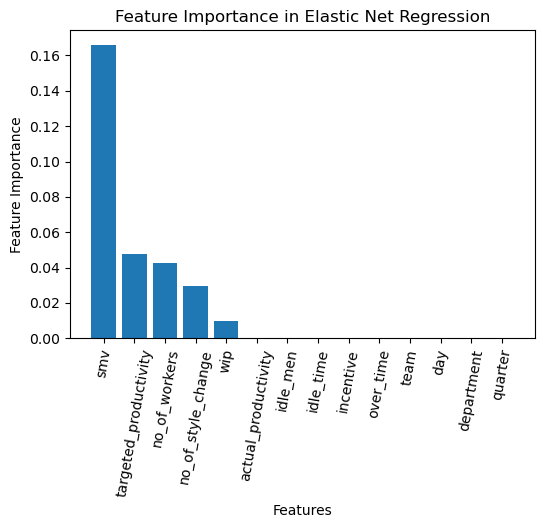

In [177]:
feature_importance = np.abs(elastic_net.coef_)

# Sort the feature importance and their corresponding features
sorted_features = [f"{df.columns[i+1]}" for i in np.argsort(feature_importance)[::-1]]
sorted_importance = np.sort(feature_importance)[::-1]

# Plot the features against the target
plt.figure(figsize=(6, 4))
plt.bar(sorted_features, sorted_importance)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Elastic Net Regression")
plt.xticks(rotation=80)
plt.show()

There seems to be only 5 considerably contributing features from the plot and the correlation values. 
Reason: 
* Since smv is the direct measurement of the time required for a qualified worker working at “Standard Performance” to perform a given task, it only makes sense that it is the most important feature here to measure actual productivity. 
* Targeted productivity would affect the actual productivity to a considerable amount due to psychological intentions to hit the target. 
* Number of workers would directly affect productivity naturally.
* Wip and no of style changes would slow down work and therefore would affect productivity to a considerable amount as well. 

The only difference between the correlation values and the plot is that trageted productivity seem to be less correlated than that assumed by the coefficients of the elastic net model. The top 5 most influencial features remain the same. 

#### Ensemble Model (Random Forest)

In [197]:
#hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create a RandomForestClassifier
rf_clf = RandomForestRegressor()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50,100,150,200], 'max_depth': range(1,20)  # Define the values to be tested
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter values and score
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

print("Best n_estimators:", best_n_estimators)
print("Best max_depth:", best_max_depth)

Best n_estimators: 150
Best max_depth: 13


In [206]:
#fitting and predicting
rf_r = RandomForestRegressor(n_estimators=150, max_depth=13)
rf_r.fit(X_train, y_train)
pred = rf_r.predict(X_test)

# performance
print (f"MAE: {metrics.mean_absolute_error(y_test,pred)}")
print (f"MSE: {metrics.mean_squared_error(y_test,pred)}")
print (f"RMSE:{np.sqrt(metrics.mean_squared_error(y_test,pred))}")
print (f"R2 :  {metrics.r2_score(y_test, pred)}")

MAE: 0.47708213729312937
MSE: 0.5995788349703254
RMSE:0.774324760659457
R2 :  0.4169717435661997


From the results, it is clear that this model outperforms all the previous ones as it shows lower values for the MSE and RMSE metrics and the highest value for the R2 metric. 

Main reasons: 
* The model is robust against outliers and noise. 
* Random forest can provide estimates of feature importance, the features with the most influence are considered. 
* Predictive accuracy is increased since combining multiple models reduce risk of overfitting and variance. 
* Can handle high dimensional feature spaces without need for dimensionality reduction techniques. 

In [1]:
import pandas as pd

# Define model names and their respective performance metrics
data = {
    'Model': ['Elastic Net', 'Support Vector Regression', 'K-Nearest Neighbors', 'Random Forest'],
    'MAE': [0.705, 0.505, 0.599, 0.477],
    'MSE': [0.895, 0.622, 0.742, 0.600],
    'RMSE': [0.946, 0.789, 0.861, 0.774],
    'R2': [0.130, 0.395, 0.279, 0.417]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Export to CSV
results_file_path = 'model_performance_results.csv'
results_df.to_csv(results_file_path, index=False)

print(f"Model performance metrics have been saved to {results_file_path}")


Model performance metrics have been saved to model_performance_results.csv


C:\Users\User\AppData\Local\Temp\ipykernel_11324\1590009192.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
